**1. Note lại các bước để viết posts cho blog sử dụng jupyter notebook**

**Bước 1: Tạo Jupyter notebook**

```bash
# Tạo thư mục chứa post mới
mkdir -p <MY-WEBSITE-FOLDER>/content/post/<SHORT-POST-TITLE>/

# chuyển đến thư mục mới tạo
cd <MY-WEBSITE-FOLDER>/content/post/<SHORT-POST-TITLE>/

# Tạo một jupyter notebook với tên là index
jupyter lab index.ipynb
```

**Bước 2: Tạo post metadata**

Cần tạo metadata cho post  ở cell đầu tiên của jupyter notebook như sau:

```
---
title: My post's title
date: 2019-09-01

# Put any other metadata here...
---
```

**Bước 3: Convert notebook to Markdown**

```bash
jupyter nbconvert index.ipynb --to markdown --NbConvertApp.output_files_dir=.
```

**2.  Machine Learning Project Template với Python**

**2.1 Một Machine Learning Project sẽ gồm các bước cơ bản sau:**

Bước 1: Chuẩn bị vấn đề:

- Nạp các thư viện cần thiết
- Load tập dữ liệu

Bước 2: Thăm dò dữ liệu (data exploring)

- Thống kê mô tả
- Trực quan hóa dữ liệu

Bước 3. Chuẩn bị dữ liệu

- Làm sạch dữ liệu (data cleaning)
- Lựa chọn và biến đổi thuộc tính
- Chuẩn hóa dữ liệu

Bước 4. Đánh giá các algorithms

Bước 5. Impove accuracy

Bước 6. Final model

### 2.2 Thực hành với bài toán Regresion

### Bước 1. Chuẩn bị vấn đề

In [2]:
# Nạp các thư viện cần thiết
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load dữ liệu
url = 'https://raw.githubusercontent.com/svcuong/Datasets/master/boston.csv'
dataset = read_csv(url, index_col=0)

**Bước 2. Thăm dò dữ liệu**

*Bước 2.1: Thống kê mô tả*

In [4]:
# Kiểm tra kích thước dữ liệu
dataset.shape

(506, 14)

In [5]:
# Kiểm tra kiểu dữ liệu của thuộc tính
dataset.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [80]:
# hiển thị 10 hàng dữ liệu đầu tiên
print(dataset.head(10))

       crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
1   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
2   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
3   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
4   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
5   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
6   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
7   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
8   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
9   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
10  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   

    ptratio   black  lstat  medv  
1      15.3  396.90   4.98  24.0  
2      17.8  396.90   9.14  21.6  
3      17.8  392.83   4.03  34.7  
4      18.7  394.63   2.94  33.4  
5      18.7  396.90  

In [6]:
# kiểm tra phân bố dữ liệu của từng thuộc tính
print(dataset.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [81]:
# Kiểm tra độ tương quan giữa các biến dạng numeric
print(dataset.corr(method = 'pearson'))

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

*Bước 2.2: Trực quan hóa dữ liệu*

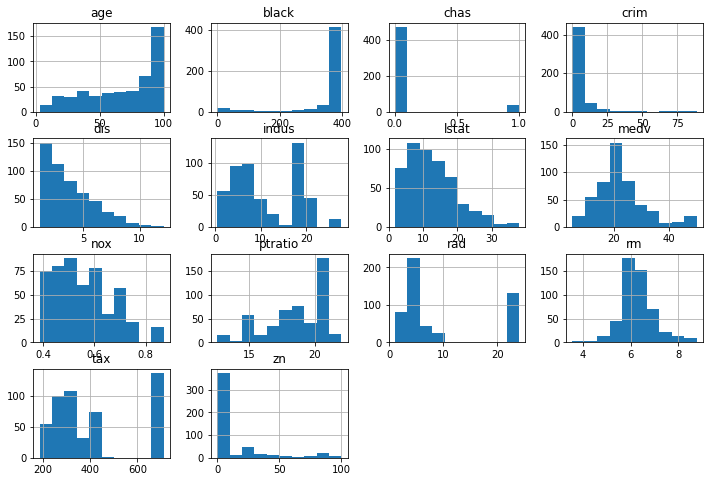

In [7]:
# Histograms cho từng thuộc tính
dataset.hist(figsize=(12,8))
plt.show()

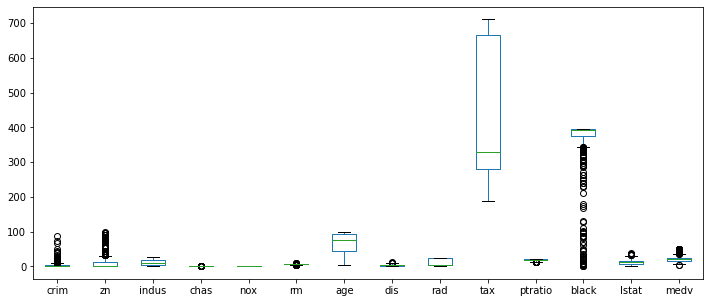

In [8]:
# Boxplot cho từng thuộc tính
dataset.plot(kind='box', figsize=(12,5))
plt.show()

NameError: name 'names' is not defined

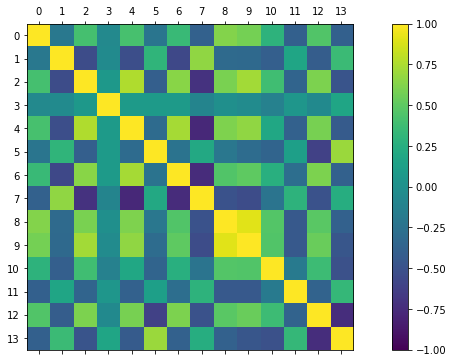

In [10]:
# correlation matrix
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

**Bước 3: Chuẩn bị dữ liệu**

In [11]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

**Bước 4: Đánh giá algorithms**

In [12]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [13]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -24.422827 (10.979527)
SVR: -67.827886 (29.049138)


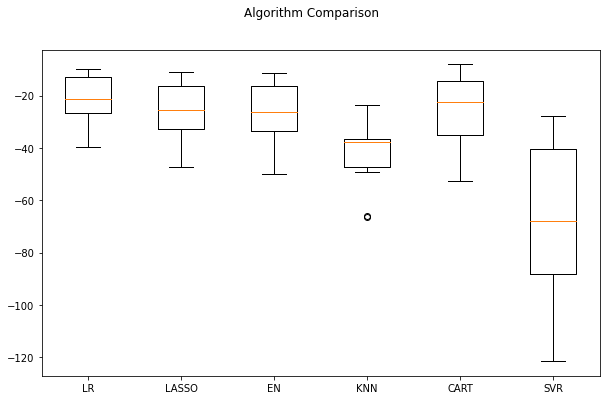

In [73]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**Bước 5: Improve Results With Tuning**

Tôi sẽ hướng dẫn ở một bài khác

**Bước 6: Finalize model**

Tôi sẽ hướng dẫn ở một bài khác